   wechat  weibo  others  sales
0   304.4   93.6   294.4    9.7
1  1011.9   34.4   398.4   16.7
2  1091.1   32.8   295.2   17.3
3    85.5  173.6   403.2    7.0
4  1047.0  302.4   553.6   22.1
Mean Squared Error: 3.156350035592387
R2 Score: 0.8689734889373588


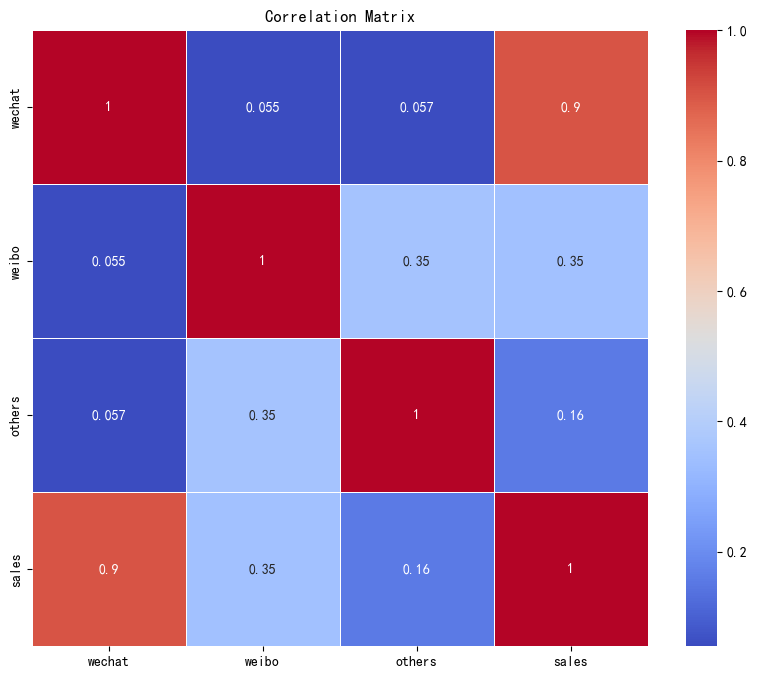

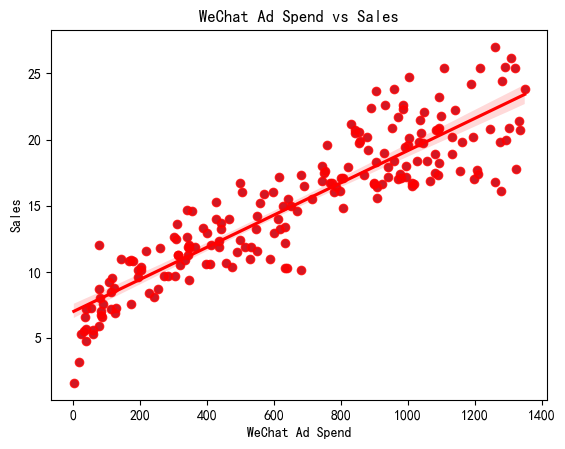

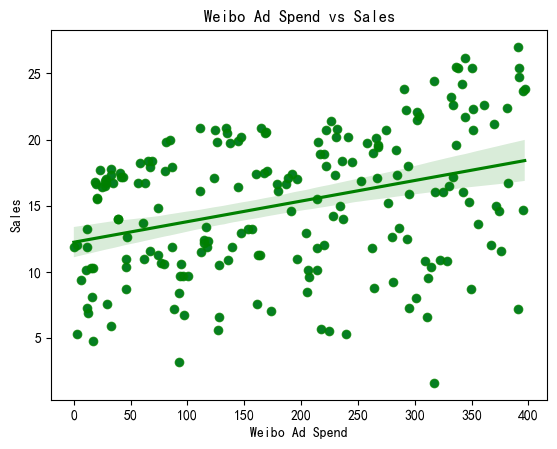

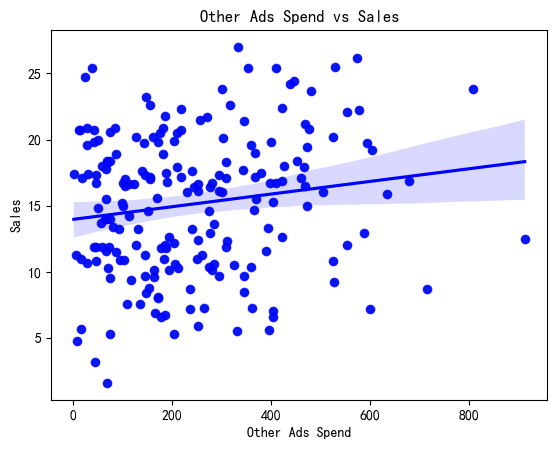

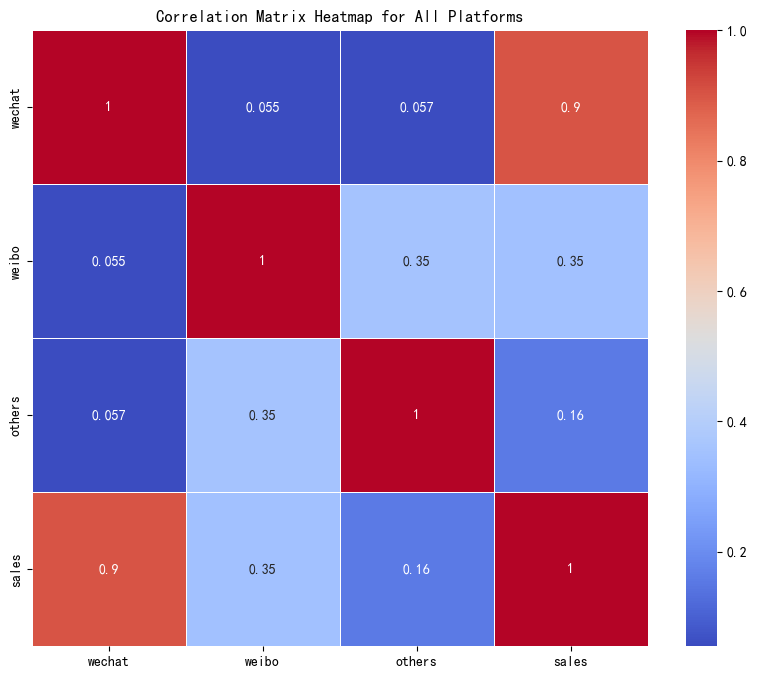


模型预测的年销售额与实际销售额的相关性评估：
dR²得分（准确率）: 0.87
均方误差（MSE）: 3.16


In [1]:
# 导入所需库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib
from matplotlib.font_manager import FontProperties

# 设置matplotlib支持中文显示
matplotlib.rcParams['font.sans-serif']=['SimHei'] # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False # 解决保存图中负号'-'显示为方块的问题

# 载入数据，注意这里使用read_csv因为文件是CSV格式
data = pd.read_csv('advertising.csv')

# 检查看数据前几行，确认数据加载正确
print(data.head())

# 接下来根据您的需求进行数据预处理、特征工程、模型训练等操作
# 例如定义特征和目标变量
X = data[['wechat', 'weibo', 'others']]
y = data['sales']

# 分割数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型
linear_regression = LinearRegression()
# 训练模型
linear_regression.fit(X_train, y_train)

# 预测销量
y_pred = linear_regression.predict(X_test)

# 评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# 热图
# 相关性矩阵热力图
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5, square=True) 
plt.title('Correlation Matrix')
plt.show()

# 统计图
# 以 wechat 和 sales 为例，其它可类似绘制
sns.scatterplot(x='wechat', y='sales', data=data)
sns.regplot(x='wechat', y='sales', data=data, color='red')
plt.title('WeChat Ad Spend vs Sales')
plt.xlabel('WeChat Ad Spend')
plt.ylabel('Sales')
plt.show()


# 绘制其他平台与sales的散点图及回归线
sns.scatterplot(x='weibo', y='sales', data=data)
sns.regplot(x='weibo', y='sales', data=data, color='green')
plt.title('Weibo Ad Spend vs Sales')
plt.xlabel('Weibo Ad Spend')
plt.ylabel('Sales')
plt.show()

sns.scatterplot(x='others', y='sales', data=data)
sns.regplot(x='others', y='sales', data=data, color='blue')
plt.title('Other Ads Spend vs Sales')
plt.xlabel('Other Ads Spend')
plt.ylabel('Sales')
plt.show()

# 绘制包含全部平台的热力图
# 注意：此处应该使用df.corr()之前的dataframe，因为我们直接用data进行相关性计算
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5, square=True)
plt.title('Correlation Matrix Heatmap for All Platforms')
plt.show()

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'\n模型预测的年销售额与实际销售额的相关性评估：\ndR²得分（准确率）: {r2:.2f}')
print(f'均方误差（MSE）: {mse:.2f}')